In [1]:
# Importing required libraries
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd    
from sklearn import metrics

# importing ploting libraries
import matplotlib.pyplot as plt   
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline


In [52]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cars-dataset.csv")

In [53]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


# EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [55]:
df.shape

(398, 8)

In [56]:
df.corr()

,cyl,disp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203
wt,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [58]:
tmp = pd.DataFrame(df.hp.str.isdigit()) #We observe "?" values in the column hp
tmp[tmp["hp"]==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [59]:
df.isna().sum() # we dont have any is null values

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [60]:
#As we observered that hp attributes is show has object due to some of the row as "?". Hence we need to replace the value in place of "?"
df = df.replace("?", np.nan)

In [61]:
df.isna().sum() # we have is null values as we replaced 6 "?" values to nan

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [62]:
df.dropna().head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [64]:
df1 = pd.read_csv("cars-dataset.csv")

In [65]:
y = df1.get_value(32,"hp")
y

C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


'?'

In [66]:
y = df.get_value(32,"hp")
y

C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


nan

In [67]:
df = df.drop("car name", axis=1) #dropping the non numeric columns as it is not required
df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


# Let us do a pair plot analysis to visually check number of likely clusters

C:\Users\Nachiappan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Nachiappan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


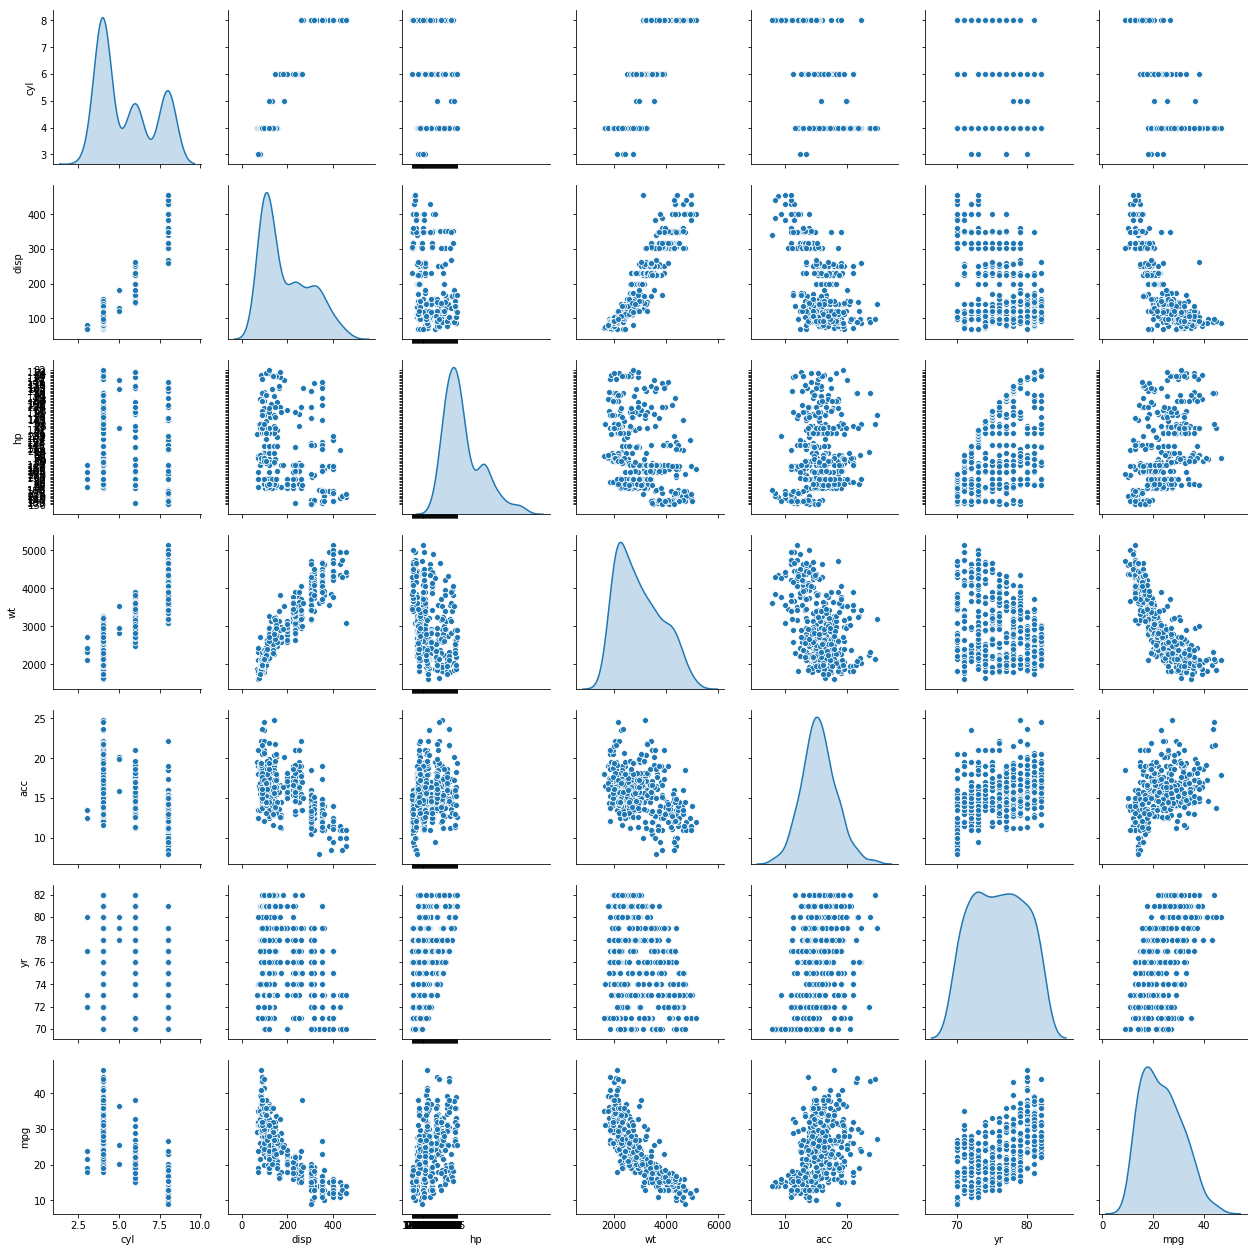

In [68]:
# Getting the values and plotting it
sns.pairplot(df,diag_kind="kde")

# From this pair plot with respect to the number of gaussian curves we observe the number of clusters as 2 or 3

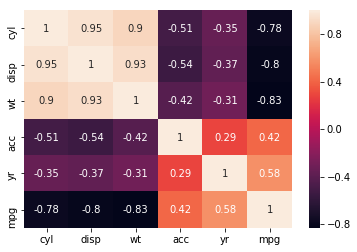

In [18]:
df1 = df.corr()
sns.heatmap(df1,annot=True) #hp column is neglected as it comes under object datatype

In [69]:
df1.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [70]:
df.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [71]:
df.corr()

,cyl,disp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203
wt,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000


MPG has a negative corelation with Displacement, HP and weight

Displacement and weight have a positive correlation


In [80]:
#Applying zscore for standardizing
from scipy.stats import zscore
df_z = df.apply(zscore)  #not able to apply as hp is a non numeric columns, Data type is object for this column

TypeError: ('can only concatenate str (not "float") to str', 'occurred at index hp')

In [72]:
#converting the variable from object to float
df['hp']= df['hp'].astype('float64')

In [77]:
df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [73]:
#Applying zscore for standardizing
from scipy.stats import zscore
df_z = df.apply(zscore)

In [74]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null float64
disp    398 non-null float64
hp      0 non-null float64
wt      398 non-null float64
acc     398 non-null float64
yr      398 non-null float64
mpg     398 non-null float64
dtypes: float64(7)
memory usage: 21.8 KB


In [76]:
df_z.head() # when you apply a zscore with nan values,(without treating the nan  values) all the values in the hp columns are becoming as nan

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,NaN,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,NaN,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,NaN,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,NaN,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,NaN,0.565841,-1.840117,-1.627426,-0.834543


In [78]:
#treating the nan values
df.fillna(df.median(),inplace=True) #replacing the nan values with median values

In [80]:
from scipy.stats import zscore #after applying
df_z = df.apply(zscore)

In [81]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null float64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null float64
acc     398 non-null float64
yr      398 non-null float64
mpg     398 non-null float64
dtypes: float64(7)
memory usage: 21.8 KB


In [24]:
df.head() #head values before applying zscore

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [82]:
df_z.head() #head values after applying zscore

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


# Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

# KMeans Clustering

Every cluster is associated with three properties

1 Cluster centeroids 

2 cluster labels

3 Cluster intertia

# Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [25]:
# Let us check optimal number of clusters-   #Nan values are there hence this code didnt work
distortion = []

cluster_range = range(1, 10)  
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(df, clusters.cluster_centers_, 'euclidean'), axis=1))/ df.shape[0])

    # combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
# Let us check optimal number of clusters-
from scipy.spatial import distance
distortion = []

cluster_range = range(1, 10)  
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(df, clusters.cluster_centers_, 'euclidean'), axis=1))/ df.shape[0])

    # combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2.896351e+08
1,2,7.428941e+07
2,3,3.420799e+07
3,4,1.905671e+07
4,5,1.375957e+07
5,6,1.034710e+07
6,7,7.662720e+06
7,8,5.679993e+06
8,9,4.726738e+06


In [85]:
# Let us check optimal number of clusters- #after applying zscore dataframe df1
from scipy.spatial import distance
distortion = []

cluster_range = range(1, 10)  
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(df_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ df_z.shape[0])

    # combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1294.841895
2,3,946.019791
3,4,738.392328
4,5,669.764742
5,6,596.854844
6,7,540.574219
7,8,498.835847
8,9,454.383214


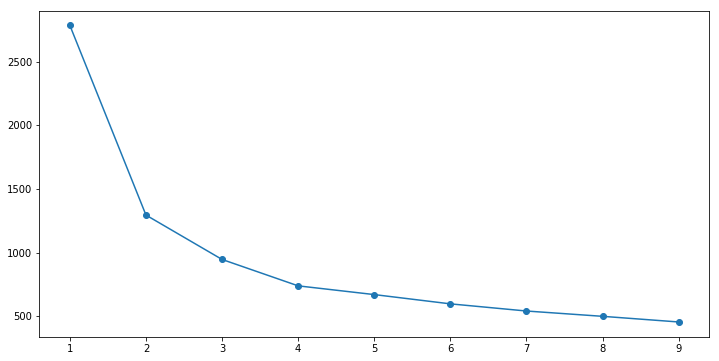

In [86]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [90]:
cluster = KMeans(n_clusters = 3, random_state =7)
cluster.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

In [91]:
#Getting the centriods value
centroids = cluster.cluster_centers_
centroids

array([[-0.83144897, -0.82490659, -0.77501083, -0.83922555,  0.42094435,
         0.80772404,  1.08070196],
       [-0.19600075, -0.19057026, -0.2390212 , -0.11260498,  0.27947274,
        -0.34293742, -0.26111315],
       [ 1.4864187 ,  1.46865697,  1.47338845,  1.36736404, -1.03371846,
        -0.61198576, -1.12726026]])

In [92]:
# Storing the centroids in a dataframe with column names from the original dataset given
centroids_df = pd.DataFrame(centroids, columns = df_z.columns)
centroids_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.831449,-0.824907,-0.775011,-0.839226,0.420944,0.807724,1.080702
1,-0.196001,-0.190570,-0.239021,-0.112605,0.279473,-0.342937,-0.261113
2,1.486419,1.468657,1.473388,1.367364,-1.033718,-0.611986,-1.127260


In [93]:
# printing the labels of the classes
labels = cluster.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1,

In [94]:
# Creating a new column "group" which will hold the cluster id of each record
pred = cluster.predict(df_z)
df_z["group"] = pred 

In [95]:
df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,group
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


In [96]:
pd.value_counts(df_z.group)

1    156
0    142
2    100
Name: group, dtype: int64

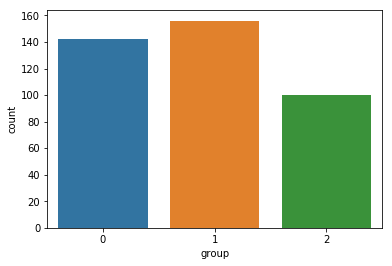

In [97]:
sns.countplot(x="group", data=df_z)

# Visual analysis by converting the centroids and the data in the cluster into box plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001922974BFD0>,
      dtype=object)

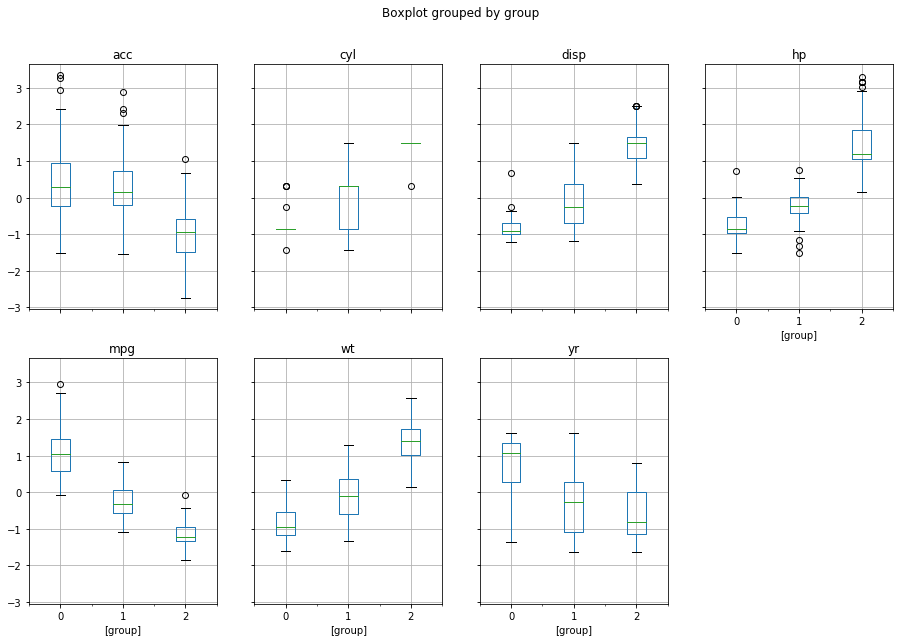

In [98]:
import matplotlib.pylab as plt
df_z.boxplot(by = 'group',  layout=(2,4), figsize=(15, 10))

we are getting cluster wise details(3 clusters/groups 0,1,2) for each columns individually and we can also see the 
corresponding centroids of them i.e. we are segreagating each and every columns against the group column


columns wt and yr is not having any outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001922CBADB00>,
      dtype=object)

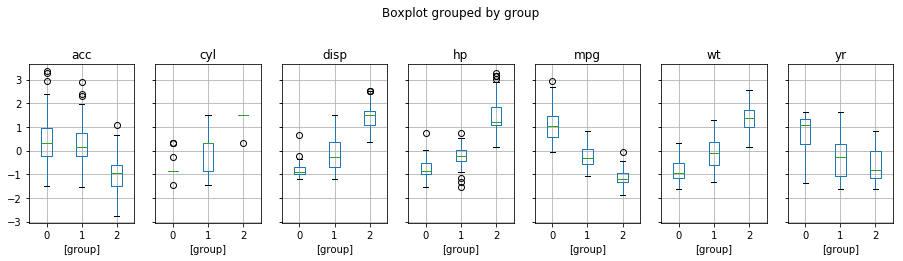

In [105]:
import matplotlib.pylab as plt
df_z.boxplot(by = 'group',  layout=(3,7), figsize=(15, 10)) #just tried with diff layout numbers

# Identifying and handling outliers

In [106]:
# Addressing outliers at group level

data = df_z 
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median() # replacing group outliers with group median      
    return group

data_corrected = (data.groupby('group').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df_z['group']))

C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001922F2926A0>,
      dtype=object)

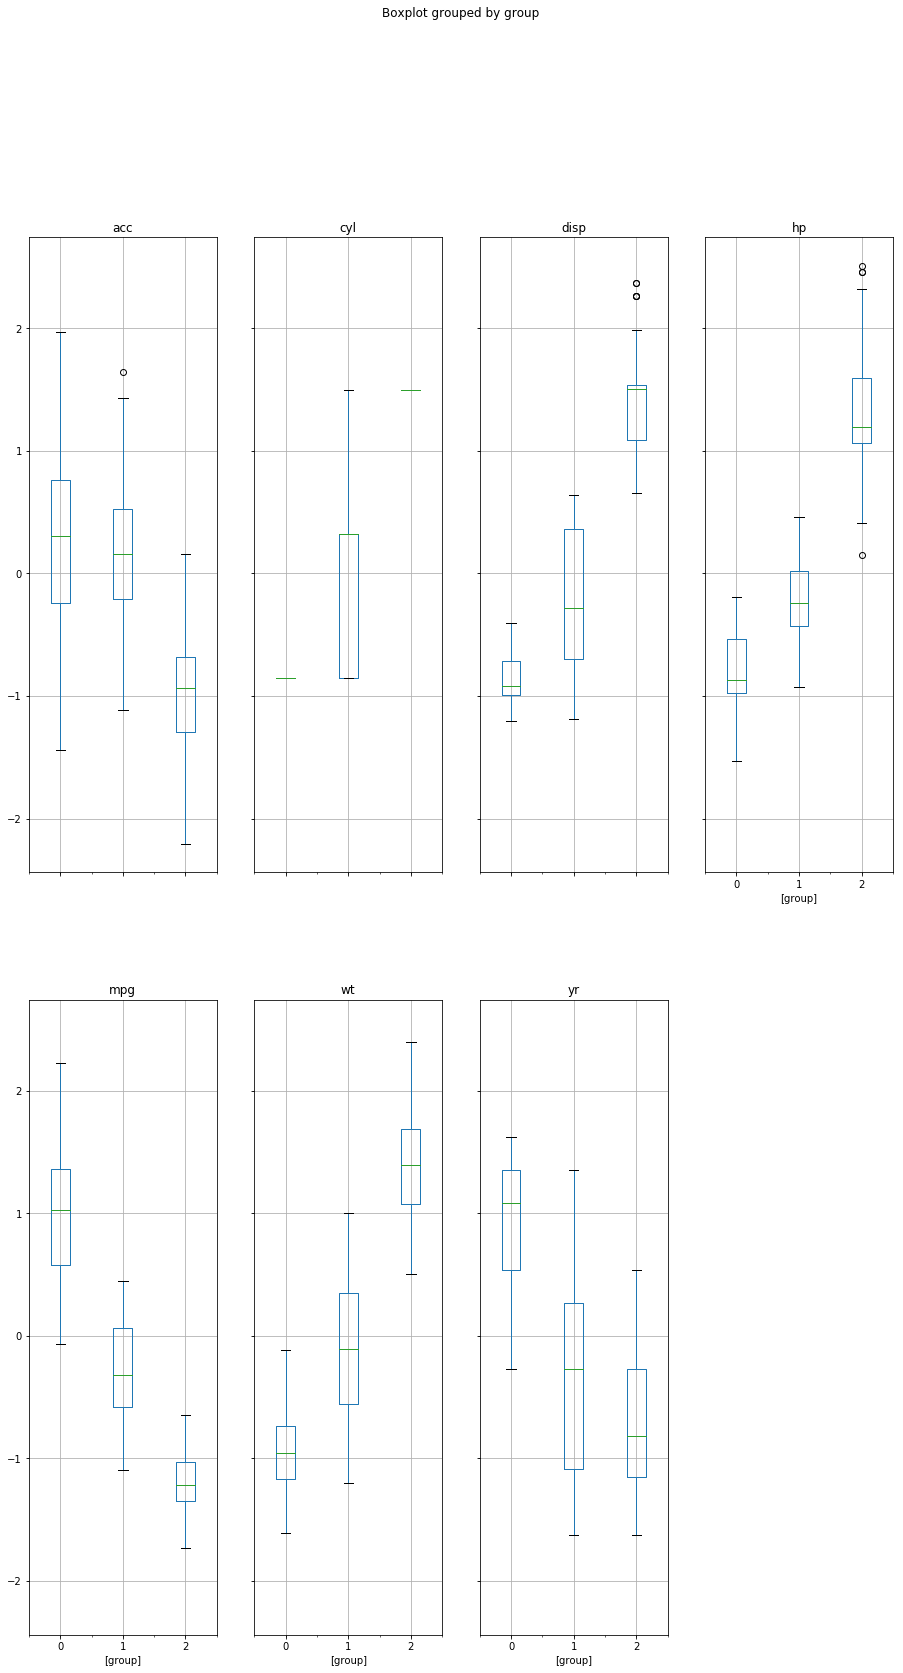

In [107]:
concat_data.boxplot(by = 'group', layout=(3,4), figsize=(15, 40))

#outliers are removed, refrence : above box plot

In [112]:
#group = 0, group = 1, group = 2 are splitted and fitted into separate 3 different dataframes
cluster_df0 = df_z[df_z["group"]==0]
cluster_df1 = df_z[df_z["group"]==1]
cluster_df2 = df_z[df_z["group"]==2]

In [113]:
print(cluster_df0.shape)
print(cluster_df1.shape)
print(cluster_df2.shape)

(142, 8)
(156, 8)
(100, 8)


In [114]:
#as we need to split the data for building the further model we are removing the group column(indicator column) from all the 
#3 dataframes
cluster_df0 = cluster_df0.drop("group", axis=1)
cluster_df1 = cluster_df1.drop("group", axis=1)
cluster_df2 = cluster_df2.drop("group", axis=1)

In [115]:
print(cluster_df0.shape)
print(cluster_df1.shape)
print(cluster_df2.shape)

(142, 7)
(156, 7)
(100, 7)


In [116]:
cluster_df0.head()

,cyl,disp,hp,wt,acc,yr,mpg
51,-0.856321,-1.098783,-0.898609,-1.059883,1.427593,-1.356642,0.830809
53,-0.856321,-1.175603,-1.029586,-1.415768,1.246054,-1.356642,0.958913
54,-0.856321,-1.166001,-0.924805,-1.604943,0.882975,-1.356642,1.471329
102,-0.856321,-0.925936,-1.527300,-1.206493,1.972212,-0.815074,0.318393
117,-0.856321,-1.204411,-1.448713,-1.304628,1.427593,-0.815074,0.702705


In [117]:
cluster_df1.head()

,cyl,disp,hp,wt,acc,yr,mpg
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,0.062185
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-1.627426,-0.194023
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-1.627426,-0.706439
17,0.320935,0.063128,-0.505677,-0.453340,0.156817,-1.627426,-0.322127
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,0.446497


In [119]:
cluster_df2.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


# Use linear regression model on different clusters separately and print the coefficients of the models individually

# Using the Linear Regression on Cluster 1

In [120]:
#import the model linear regression
from sklearn.linear_model import LinearRegression

In [122]:
X1 = cluster_df0.drop("mpg", axis=1)
y1 = cluster_df0[["mpg"]] #mpg target attribute

In [123]:
X1.shape

(142, 6)

In [124]:
y1.shape

(142, 1)

In [125]:
#splitting the data into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=.30, random_state=7)

In [133]:
print("Train Data spilt shape :",X_train1.shape,y_train1.shape)
print("Test Data spilt shape :",X_test1.shape,y_test1.shape)

Train Data spilt shape : (99, 6) (99, 1)
Test Data spilt shape : (43, 6) (43, 1)


In [134]:
LR_model1 = LinearRegression()
LR_model1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
print("Model score TRAIN DATASET :", LR_model1.score(X_train1,y_train1))

model score TRAIN DATASET : 0.5500127608772148


In [136]:
print("Model score TEST DATASET :", LR_model1.score(X_test1,y_test1))

Model score TEST DATASET : 0.489692784395801


In [140]:
#Cofficient of our model
for idx, col_name in enumerate(X_train1.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model1.coef_[0][idx]))

The coefficient for cyl is 1.0933504431590537
The coefficient for disp is -0.13550570094932526
The coefficient for hp is -0.19445286533160716
The coefficient for wt is -1.0219136526402754
The coefficient for acc is 0.11269267135427881
The coefficient for yr is 0.48333175392552014


In [139]:
#intercept of our model
intercept1 = LR_model1.intercept_[0]
print("The intercept for our model is {}".format(intercept1))

The intercept for our model is 0.4257676827559226


# Using the Linear Regression on Cluster 2

In [141]:
X2 = cluster_df1.drop("mpg", axis=1)
y2 = cluster_df1[["mpg"]]
print(X2.shape)
print(y2.shape)

(156, 6)
(156, 1)


In [142]:
X2.head()

,cyl,disp,hp,wt,acc,yr
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-1.627426
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-1.627426
17,0.320935,0.063128,-0.505677,-0.453340,0.156817,-1.627426
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426


In [143]:
#splitting the data into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=.30, random_state=7)

In [144]:
print("Train Data spilt shape :",X_train2.shape,y_train2.shape)
print("Test Data spilt shape :",X_test2.shape,y_test2.shape)

Train Data spilt shape : (109, 6) (109, 1)
Test Data spilt shape : (47, 6) (47, 1)


In [145]:
LR_model2 = LinearRegression()
LR_model2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
LR_model2.score(X_train2,y_train2)

0.5294858856868081

In [147]:
LR_model2.score(X_test2,y_test2)

0.6172574363071315

In [148]:
#Cofficient of our model
for idx, col_name in enumerate(X_train2.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model2.coef_[0][idx]))

The coefficient for cyl is 0.023952438439808137
The coefficient for disp is -0.022533014928198234
The coefficient for hp is -0.1839222388308886
The coefficient for wt is -0.5398454843959586
The coefficient for acc is -0.06591574154109013
The coefficient for yr is 0.18753734154134902


In [149]:
#intercept of our model
intercept2 = LR_model2.intercept_[0]
print("The intercept for our model is {}".format(intercept2))

The intercept for our model is -0.26817013556892755


# Using the Linear Regression on Cluster 3

In [150]:
X3 = cluster_df2.drop("mpg", axis=1)
y3 = cluster_df2[["mpg"]]
print(X3.shape)
print(y3.shape)

(100, 6)
(100, 1)


In [151]:
#splitting the data into train and test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size=.30, random_state=7)

In [152]:
print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)
print(y_test3.shape)

(70, 6)
(70, 1)
(30, 6)
(30, 1)


In [153]:
LR_model3 = LinearRegression()
LR_model3.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
LR_model3.score(X_train3,y_train3)

0.48621007566959046

In [155]:
#Cofficient of our model
for idx, col_name in enumerate(X_train3.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model3.coef_[0][idx]))

The coefficient for cyl is 0.9088632052212458
The coefficient for disp is 0.26045202765533326
The coefficient for hp is -0.151678931057658
The coefficient for wt is -0.2657551416656463
The coefficient for acc is 0.005673140228249207
The coefficient for yr is 0.15295873387542672


In [156]:
#intercept of our model
intercept3 = LR_model3.intercept_[0]
print("The intercept for our model is {}".format(intercept3))

The intercept for our model is -2.178386353253285


# Linear Regression on original dataset

In [157]:
df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,group
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


In [158]:
X_orig = df_z.drop(["mpg","group"], axis=1)
y_orig = df_z[["mpg"]]
print(X_orig.shape)
print(y_orig.shape)

(398, 6)
(398, 1)


In [159]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_orig,y_orig, test_size=.30, random_state=7)

In [160]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(278, 6)
(278, 1)
(120, 6)
(120, 1)


In [161]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
reg_model.score(X_train,y_train)

0.8306556200985382

In [163]:
reg_model.score(X_test,y_test)

0.7352498801865761

In [164]:
#Cofficient of our model
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for cyl is -0.16456615071204364
The coefficient for disp is 0.13697789772491914
The coefficient for hp is -0.009340803020496532
The coefficient for wt is -0.698075768123819
The coefficient for acc is -0.03003121934482754
The coefficient for yr is 0.37577637364940236


In [165]:
#intercept of our model
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.0031729462348835495


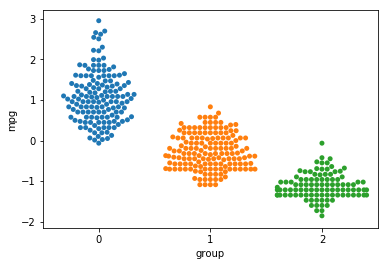

In [166]:
sns.swarmplot(df_z.group,df_z.mpg)